<h1>Data Preprocessing</h1>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
afDatasetProcessed = pd.read_csv("processedAFDataset.csv")

afDatasetProcessed.head()


,Duration,Total Stops,Price,Airline,Class,DepartureLocation,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2.05,0,5335,SpiceJet,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,After 6 pm
1,2.20,0,5899,Indigo,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,Before 6 am
2,2.10,0,5801,GO FIRST,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,Before 6 am
3,2.05,0,5794,SpiceJet,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,After 6 pm
4,2.10,0,5955,Air India,ECONOMY,Delhi,Mumbai,1.0,Monday,After 6 pm,After 6 pm


<h2>Label Encoding</h2>

In [3]:
labelEncoder = LabelEncoder()
afDatasetProcessed["Airline"] = labelEncoder.fit_transform(
    afDatasetProcessed["Airline"]
)
afDatasetProcessed["Class"] = labelEncoder.fit_transform(afDatasetProcessed["Class"])
afDatasetProcessed["DepartureLocation"] = labelEncoder.fit_transform(
    afDatasetProcessed["DepartureLocation"]
)
afDatasetProcessed["ArrivalLocation"] = labelEncoder.fit_transform(
    afDatasetProcessed["ArrivalLocation"]
)
afDatasetProcessed["JourneyDayOfWeek"] = labelEncoder.fit_transform(
    afDatasetProcessed["JourneyDayOfWeek"]
)
afDatasetProcessed["DepartureRange"] = labelEncoder.fit_transform(
    afDatasetProcessed["DepartureRange"]
)
afDatasetProcessed["ArrivalRange"] = labelEncoder.fit_transform(
    afDatasetProcessed["ArrivalRange"]
)

In [4]:
afDatasetProcessed.head()

,Duration,Total Stops,Price,Airline,Class,DepartureLocation,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange
0,2.05,0,5335,6,1,3,6,1.0,1,2,2
1,2.20,0,5899,5,1,3,6,1.0,1,2,3
2,2.10,0,5801,4,1,3,6,1.0,1,2,3
3,2.05,0,5794,6,1,3,6,1.0,1,2,2
4,2.10,0,5955,0,1,3,6,1.0,1,2,2


<h2>Splitting & Scalling</h2>

<h3>Independent and Dependent Split; Test Split</h3>
<h3>Min Max Scaller</h3>

In [5]:
X = afDatasetProcessed.drop(["Price"], axis=1)
Y = afDatasetProcessed["Price"]

# https://www.pluralsight.com/guides/importing-and-splitting-data-into-dependent-and-independent-features-for-ml
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=25)

scaler = MinMaxScaler(feature_range=(0, 1))
xTrain = pd.DataFrame(scaler.fit_transform(xTrain))
xTest = pd.DataFrame(scaler.fit_transform(xTest))

xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((361670, 10), (90418, 10), (361670,), (90418,))

<div style="border-radius:15px;
            background-color:beige;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:brown;
              text-align:center;'>
              Training Machine Learning Models
    </h1>
    </div>

<div style="border-radius:15px;
            background-color:maroon;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
              1. Linear Regression
    </h2>
    </div>

In [11]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(xTrain, yTrain)
reg.score(xTest, yTest)
# R2

0.3965947596149303

In [8]:
yPred = reg.predict(xTest)
out = pd.DataFrame({"Price_actual": yTest, "Price_pred": yPred})
result = afDatasetProcessed.merge(out, left_index=True, right_index=True)
result.sample(10)

,Duration,Total Stops,Price,Airline,Class,DepartureLocation,ArrivalLocation,BookingJourneyDifference,JourneyDayOfWeek,DepartureRange,ArrivalRange,Price_actual,Price_pred
319274,5.20,1,64642,8,0,5,1,7.0,3,0,2,64642,40141.809829
143675,23.50,1,20930,8,3,6,2,13.0,2,2,2,20930,9024.879515
329235,16.00,1,13471,8,3,5,1,48.0,2,2,1,13471,-93.385372
153566,7.55,1,16394,8,3,6,2,49.0,3,0,2,16394,-3153.138548
133335,9.25,1,15834,8,3,6,5,17.0,6,2,1,15834,2408.767311
346419,7.35,1,12749,8,1,5,0,17.0,6,0,2,12749,26095.726509
39875,26.30,1,44405,0,0,3,4,12.0,0,1,1,44405,39192.525672
204190,16.10,1,9874,0,1,1,4,27.0,2,0,1,9874,18353.287848
265655,24.15,1,5696,0,1,4,1,23.0,5,1,1,5696,22090.246372
440912,6.55,1,9159,5,1,0,5,20.0,2,2,3,9159,20118.235595


<Axes: xlabel='BookingJourneyDifference', ylabel='Price_actual'>

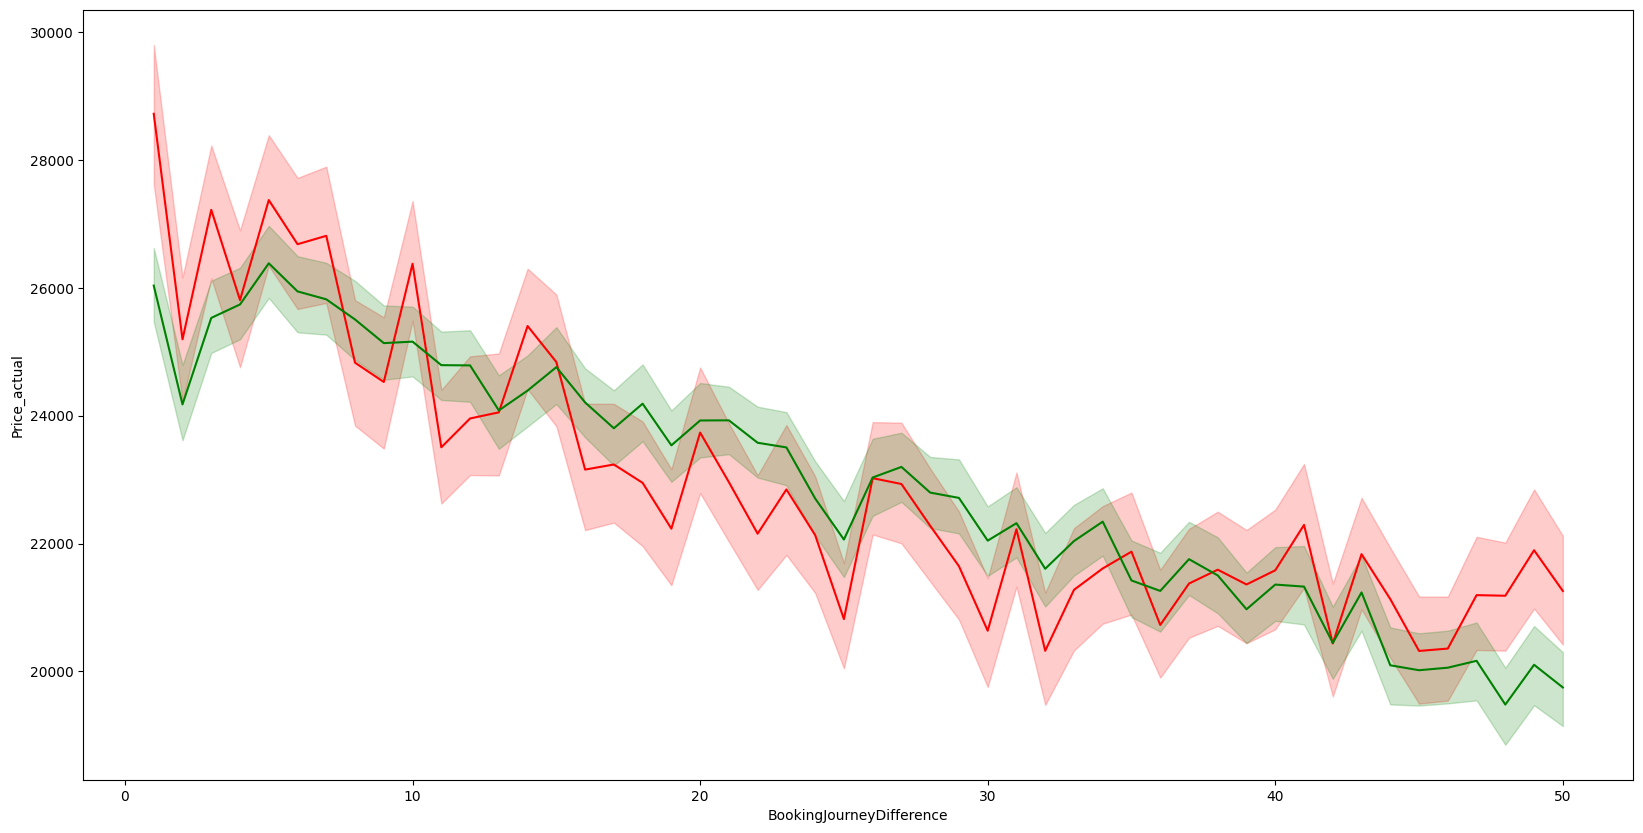

In [10]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_actual", color="red")
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_pred", color="green")

<div style="border-radius:15px;
            background-color:maroon;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
              2. Ridge Regression
    </h2>
    </div>

In [12]:
ridge = linear_model.Ridge()
ridge.fit(xTrain, yTrain)
ridge.score(xTest, yTest)

0.39659485903285185

<Axes: xlabel='BookingJourneyDifference', ylabel='Price_actual'>

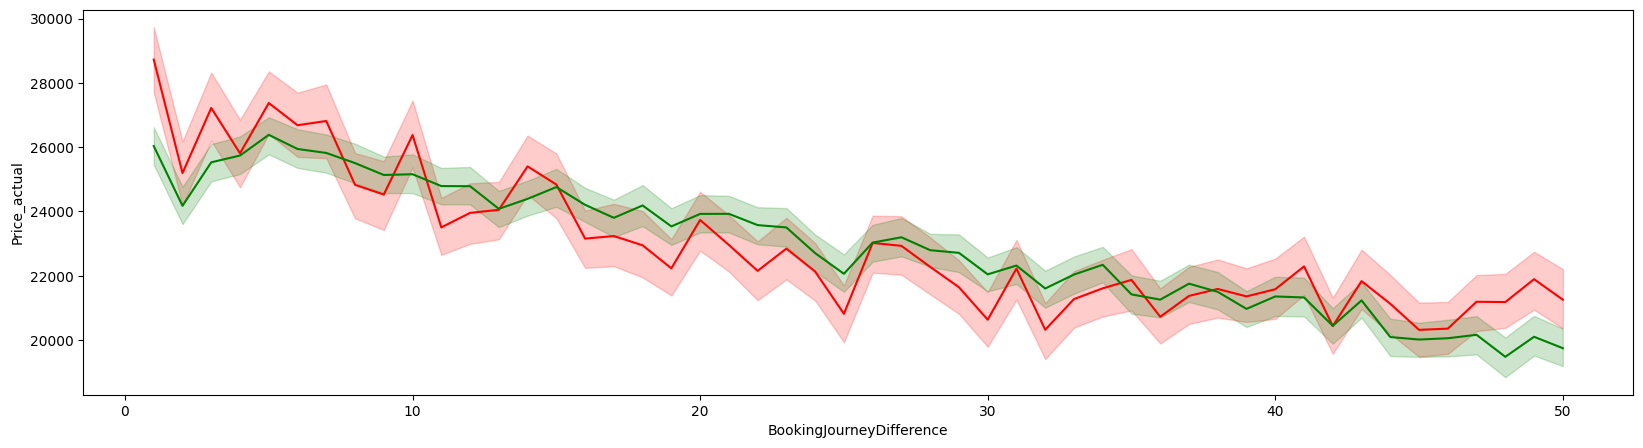

In [14]:
yPred = ridge.predict(xTest)
out = pd.DataFrame({"Price_actual": yTest, "Price_pred": yPred})
result = afDatasetProcessed.merge(out, left_index=True, right_index=True)
# result.sample(10)
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_actual", color="red")
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_pred", color="green")

<div style="border-radius:15px;
            background-color:maroon;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
              3. Decision Tree Regression
    </h2>
    </div>

In [15]:
from sklearn.tree import DecisionTreeRegressor

dTreeReg = DecisionTreeRegressor()
dTreeReg.fit(xTrain, yTrain)
dTreeReg.score(xTest, yTest)

0.9215108077047156

<Axes: xlabel='BookingJourneyDifference', ylabel='Price_actual'>

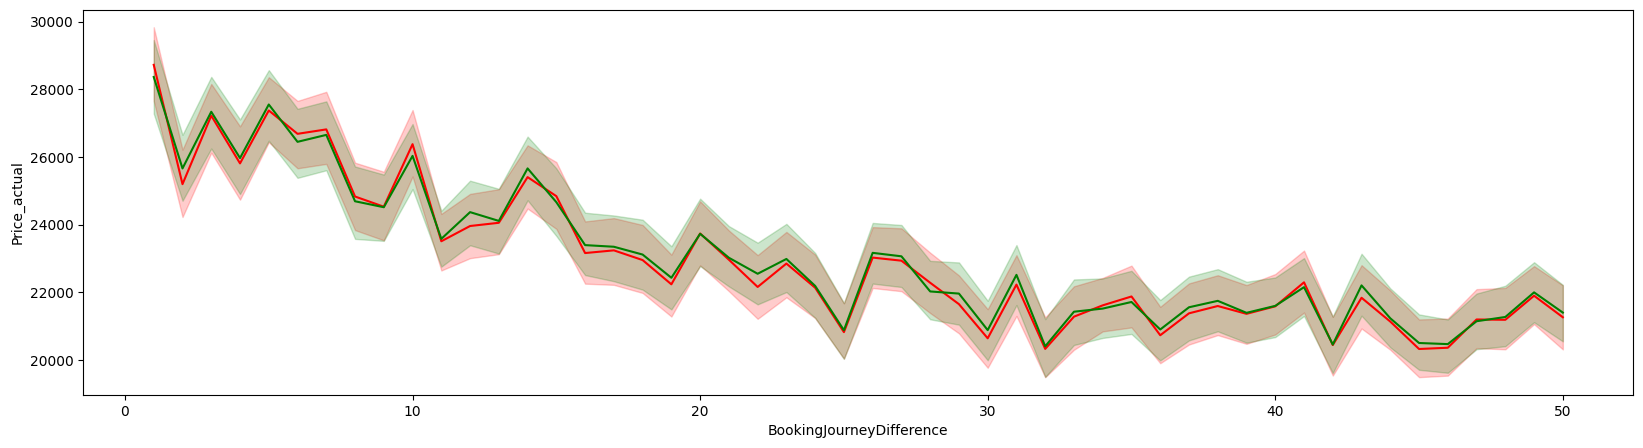

In [16]:
yPred = dTreeReg.predict(xTest)
out = pd.DataFrame({"Price_actual": yTest, "Price_pred": yPred})
result = afDatasetProcessed.merge(out, left_index=True, right_index=True)
# result.sample(10)
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_actual", color="red")
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_pred", color="green")

<div style="border-radius:15px;
            background-color:maroon;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
              4. Random Forest Regression
    </h2>
    </div>

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor()
rfReg.fit(xTrain, yTrain)
rfReg.score(xTest, yTest)

0.9554709891918177

<Axes: xlabel='BookingJourneyDifference', ylabel='Price_actual'>

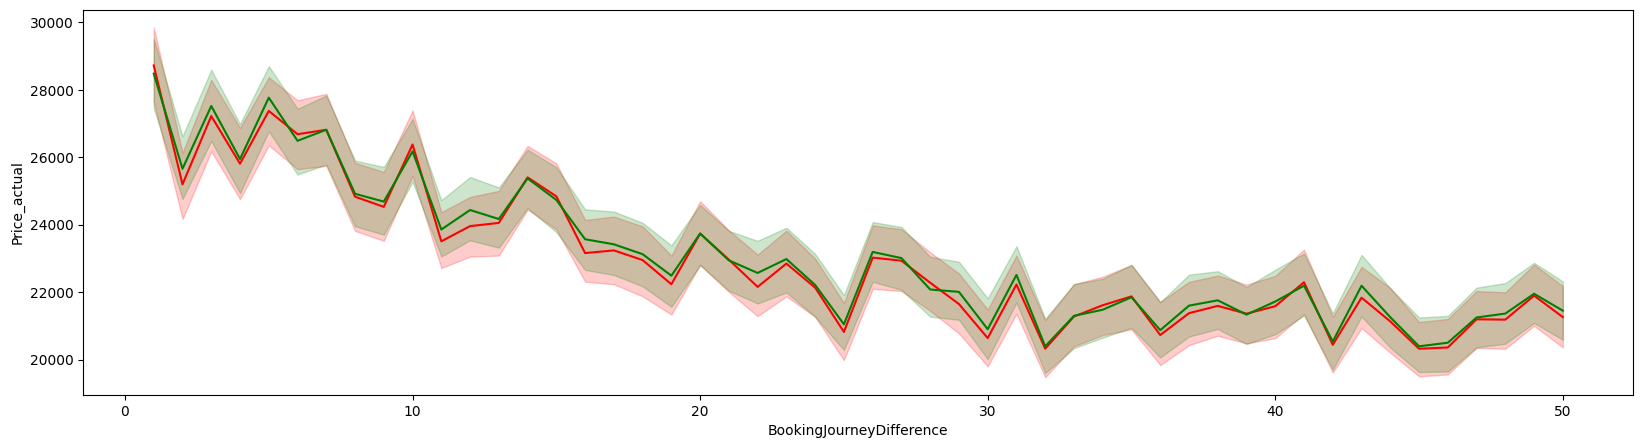

In [18]:
yPred = rfReg.predict(xTest)
out = pd.DataFrame({"Price_actual": yTest, "Price_pred": yPred})
result = afDatasetProcessed.merge(out, left_index=True, right_index=True)
# result.sample(10)
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_actual", color="red")
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_pred", color="green")

<div style="border-radius:15px;
            background-color:maroon;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:white;
              text-align:center;'>
              5. Extra Trees Regression
    </h2>
    </div>

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

eTreeReg = ExtraTreesRegressor()
eTreeReg.fit(xTrain, yTrain)
eTreeReg.score(xTest, yTest)

0.9452837275749315

<Axes: xlabel='BookingJourneyDifference', ylabel='Price_actual'>

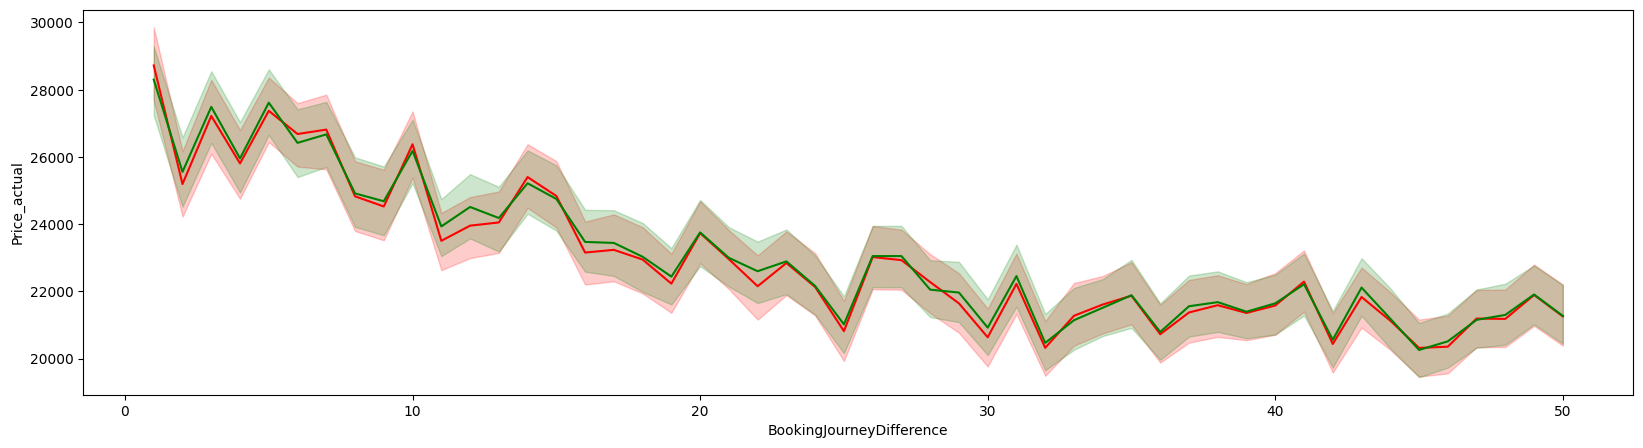

In [20]:
yPred = eTreeReg.predict(xTest)
out = pd.DataFrame({"Price_actual": yTest, "Price_pred": yPred})
result = afDatasetProcessed.merge(out, left_index=True, right_index=True)
# result.sample(10)
plt.figure(figsize=(20, 5))
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_actual", color="red")
sns.lineplot(data=result, x="BookingJourneyDifference", y="Price_pred", color="green")

<div style="border-radius:15px;
            background-color:rgb(2, 88, 2);
            letter-spacing:1px">
    <h3 style='padding-top: 20px;
               padding-bottom: 0px;
              color:beige;
              text-align:center;'>
        The Winner is:  
    </h3>
    <h1 style='padding-bottom: 20px;
              padding-top: 0px;
              color:beige;
              text-align:center;'>
        Random Forest Regressor <sup>with R<sup>2</sup> score <b>95.5</b></sup>  
    </h1>
    </div>